<a href="https://colab.research.google.com/github/SP-TechForest/Python-creations/blob/main/Covid_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import regex as re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='english')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import matplotlib.pyplot as plt 
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [165]:
data = pd.read_csv("Corona_NLP_test.csv")

In [166]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [167]:
le = LabelEncoder()
data['Encoded_sentiment'] = le.fit_transform(data['Sentiment'])

In [168]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Encoded_sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative,0
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive,4
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive,1
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative,2
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral,3


In [169]:
data.shape

(3798, 7)

In [170]:
px.bar(x = data.Sentiment.value_counts().index, y = data.Encoded_sentiment.value_counts(),title = 'Data distribution among various sentiments',
       labels = {
           'x':'Sentiments',
           'y':'Count'
       })

In [171]:
def remove_https (text):
  https_remover = re.compile(r'https\S+')
  return https_remover.sub(r'',text)
def remove_brackets (text):
  brackets_remover = re.compile(r"\(.+?\)")
  return brackets_remover.sub(r'',text)
def remove_at (text):
  at_remover = re.compile(r"@\S+")
  return at_remover.sub(r'',text)
def remove_sym (text):
  clean_list = [char for char in text if char not in string.punctuation]
  clean_str = ''.join(clean_list)
  return clean_str
  return sym_remover.sub(r'',text)
def lower(text):
  low_text = text.lower()
  return low_text
def remove_num(text):
  remove = re.sub(r'\d+', '' ,text)
  return remove
def remove_spaces(text):
  remove = re.sub(r'\n+|\r+','', text)
  return remove
def remove_html(text):
  remove = re.sub(r'<.*?>','', text)
  return remove

In [172]:
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_https(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_brackets(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_at(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_sym(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: lower(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_num(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_spaces(x))
data['OriginalTweet'] = data['OriginalTweet'].apply(lambda x: remove_html(x))

In [173]:
data.OriginalTweet.unique()[0:10]

array(['trending new yorkers encounter empty supermarket shelves  soldout online grocers  as coronavirusfearing shoppers stock up  ',
       'when i couldnt find hand sanitizer at fred meyer i turned to amazon but  for a  pack of purellcheck out how  coronavirus concerns are driving up prices ',
       'find out how you can protect yourself and loved ones from coronavirus ',
       'panic buying hits newyork city as anxious shoppers stock up on foodampmedical supplies after healthcare worker in her s becomes bigapple st confirmed coronavirus patient or a bloomberg staged eventqanon qanon qanon election cdc ',
       'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news  corvid newsmelb dunnypapergate costco    one week everyone buying baby milk powder the next everyone buying up toilet paper ',
       'do you remember the last time you paid  a gallon for regular gas in los angelesprices at the pump are going down a look at how the coronavirus is impactin

In [174]:
data['TweetLen'] = data.OriginalTweet.apply(lambda x: len(x))

In [175]:
px.histogram(x = data.TweetLen, title = 'Length distribution of Tweets')

In [176]:
text_data = data.OriginalTweet
stop_words.add('couldnt')
def clean_text(string_):
  s = string_.lower()
  s = word_tokenize(s)
  s = [word for word in s if not word in stop_words]
  s = [stemmer.stem(word) for word in s]
  return s

In [177]:
nltk.download('punkt')
from tqdm import tqdm 
for i in tqdm(range(text_data.shape[0])):
  text_data[i] = clean_text(text_data[i])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  0%|          | 0/3798 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 3798/3798 [00:04<00:00, 910.85it/s]


In [178]:
text_data

0       [trend, new, yorker, encount, empti, supermark...
1       [find, hand, sanit, fred, meyer, turn, amazon,...
2                 [find, protect, love, one, coronavirus]
3       [panic, buy, hit, newyork, citi, anxious, shop...
4       [toiletpap, dunnypap, coronavirus, coronavirus...
                              ...                        
3793    [meanwhil, supermarket, israel, peopl, danc, s...
3794    [panic, buy, lot, nonperish, item, echo, need,...
3795    [asst, prof, econom, talk, recent, research, c...
3796    [gov, need, someth, instead, biar, je, rakyat,...
3797    [member, commit, safeti, employe, endus, monit...
Name: OriginalTweet, Length: 3798, dtype: object

In [179]:
for i in tqdm(range(text_data.shape[0])):
    text_data[i] = " ".join(text_data[i])

  0%|          | 0/3798 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

100%|██████████| 3798/3798 [00:01<00:00, 2211.09it/s]


In [180]:
data.Sentiment.unique()


array(['Extremely Negative', 'Positive', 'Extremely Positive', 'Negative',
       'Neutral'], dtype=object)

In [181]:
# lm_data = text_data.copy()

In [182]:
# lemmatization = WordNetLemmatizer()

In [183]:
# for i in tqdm(range(lm_data.shape[0])):
  # lm_data[i] = [lemmatization.lemmatize(word) for word in lm_data[i]]

In [184]:
# data['lm_tweet'] = lm_data

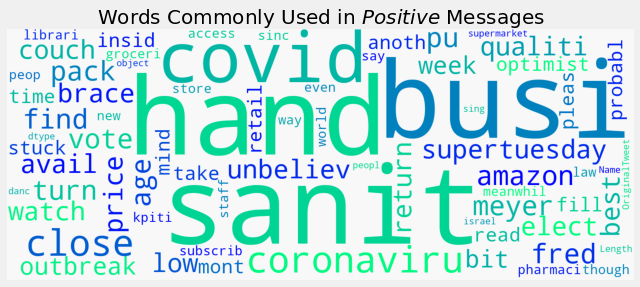

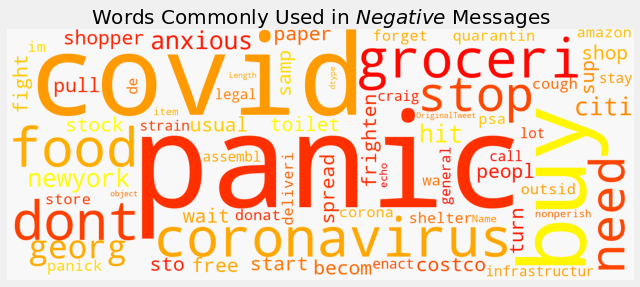

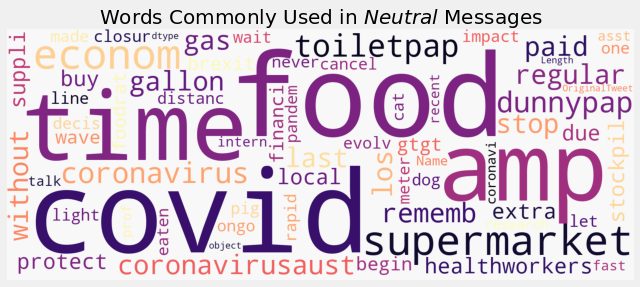

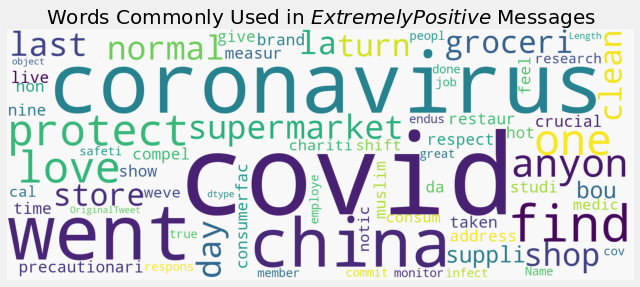

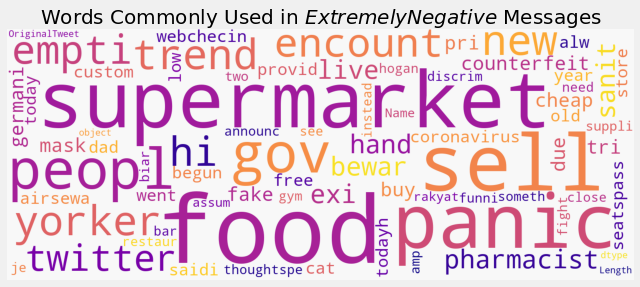

In [186]:

for label, cmap in zip(['Positive', 'Negative', 'Neutral', 'Extremely Positive', 'Extremely Negative'],
                       ['winter', 'autumn', 'magma', 'viridis', 'plasma']):
    text = str(data.query('Sentiment == @label')['OriginalTweet'])
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1500, height=600, background_color="#f8f8f8", colormap=cmap)
    wc.generate_from_text(text)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ Messages", size=20)
    plt.show()
    print('\n')

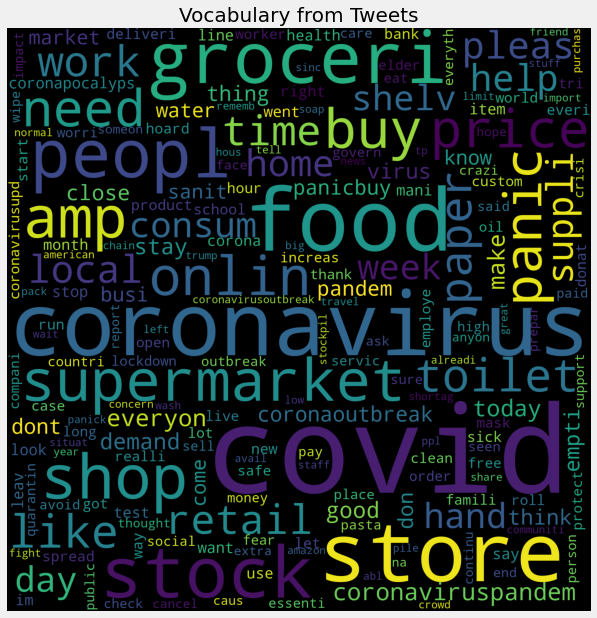

In [162]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(data['OriginalTweet'])
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

wordcloud = WordCloud(background_color = 'black', width = 2000, height = 2000).generate_from_frequencies(dict(words_freq))

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.title("Vocabulary from Tweets", fontsize = 20)
plt.show()